# Índice de contenidos
1. Antes de empezar

2. Reto 1 - Explorar el conjunto de datos

    2.0.0.1 Explore los datos a vista de pájaro.
    
    2.0.0.2 A continuación, evalúe si las columnas de este conjunto de datos están fuertemente correlacionadas.

3. Reto 2 - Eliminar la colinealidad de columnas.

4. Reto 3 - Manejar los valores perdidos

    4.0.0.1 En las celdas siguientes, trate los valores que faltan en el conjunto de datos. Recuerde comentar los fundamentos de sus decisiones.
    
    4.0.0.2 De nuevo, examine el número de valores que faltan en cada columna.

5. Reto 4 - Manejo de datos categóricos WHOIS_*
    
    5.0.0.1 En las celdas siguientes, fije los valores de los países como se ha indicado anteriormente.
    
    5.0.0.2 Si un número limitado de valores representa la mayoría de los datos, podemos conservar estos valores principales y volver a etiquetar todos los demás valores poco frecuentes.
    
    5.0.0.3 Después de comprobarlo, mantengamos los 10 valores principales de la columna y reetiquetemos las demás columnas con OTROS.
    
    5.0.0.4 En la siguiente celda, elimine ['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'].

6. Reto 5 - Manejar los datos categóricos restantes y convertirlos en ordinales
    
    6.0.0.1 URL es fácil. Simplemente la eliminaremos porque tiene demasiados valores únicos que no hay forma de consolidar.
    
    6.0.0.2 Imprima el conteo de valores únicos de CHARSET. Puede ver que sólo hay unos pocos valores únicos. Así que podemos dejarlo como está.
    
    6.0.0.3 Antes de pensar en su propia solución, no lea las instrucciones que vienen a continuación.

7. Desafío 6 - Modelado, predicción y evaluación
    
    7.0.0.1 En este laboratorio probaremos dos modelos diferentes y compararemos nuestros resultados.
    
    7.0.0.2 Nuestro segundo algoritmo es DecisionTreeClassifier.
    
    7.0.0.3 Crearemos otro modelo DecisionTreeClassifier con max_depth=5.

8. Bonus Challenge - Escalado de características

# Antes de empezar:
- Lee el archivo README.md
- Comenta todo lo que puedas y utiliza los recursos del archivo README.md
- ¡Feliz aprendizaje!

In [189]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

En este laboratorio, exploraremos un conjunto de datos que describe sitios web con diferentes características y los etiqueta como benignos o maliciosos. Utilizaremos algoritmos de aprendizaje supervisado para averiguar qué patrones de características es probable que tengan los sitios web maliciosos y utilizaremos nuestro modelo para predecir sitios web maliciosos.

Sus características serán:

+ URL: es la identificación anónima de la URL analizada en el estudio
+ URL_LENGTH: es el número de caracteres de la URL
+ NUMBER_SPECIAL_CHARACTERS: es el número de caracteres especiales identificados en la URL, como, «/», «%», «#», «&», «. “, ”=»
+ CHARSET: es un valor categórico y su significado es el estándar de codificación de caracteres (también llamado juego de caracteres).
+ SERVER: es un valor categórico y su significado es el sistema operativo del servidor obtenido de la respuesta del paquete.
+ CONTENT_LENGTH: representa el tamaño del contenido de la cabecera HTTP.
+ WHOIS_COUNTRY: es una variable categórica, sus valores son los países que obtuvimos de la respuesta del servidor (en concreto, nuestro script utilizó la API de Whois).
+ WHOIS_STATEPRO: es una variable categórica, sus valores son los estados que obtuvimos de la respuesta del servidor (en concreto, nuestro script utilizó la API de Whois).
+ WHOIS_REGDATE: Whois proporciona la fecha de registro del servidor, por tanto, esta variable tiene valores de fecha con formato DD/MM/AAAA HH:MM
+ WHOIS_UPDATED_DATE: A través del Whois obtenemos la última fecha de actualización del servidor analizado
+ TCP_CONVERSATION_EXCHANGE: Esta variable es el número de paquetes TCP intercambiados entre el servidor y nuestro cliente honeypot
+ DIST_REMOTE_TCP_PORT: es el número de puertos detectados y diferentes a TCP
+ REMOTE_IPS: esta variable tiene el número total de IPs conectadas al honeypot
+ APP_BYTES: es el número de bytes transferidos
+ SOURCE_APP_PACKETS: paquetes enviados desde el honeypot al servidor
+ REMOTE_APP_PACKETS: paquetes recibidos del servidor
+ APP_PACKETS: número total de paquetes IP generados durante la comunicación entre el honeypot y el servidor.
+ DNS_QUERY_TIMES: número de paquetes DNS generados durante la comunicación entre el honeypot y el servidor.
+ TYPE: es una variable categórica, sus valores representan el tipo de página web analizada, en concreto, 1 es para sitios web maliciosos y 0 para sitios web benignos

# Desafío 1 - Explorar el conjunto de datos

Empecemos explorando el conjunto de datos. Primero carga el archivo de datos:

In [190]:
websites = pd.read_csv('../website.csv')


#### Explore los datos a vista de pájaro.

Ahora ya deberías estar muy familiarizado con los procedimientos, así que no te daremos las instrucciones paso a paso. Reflexiona sobre lo que hiciste en los laboratorios anteriores y explora el conjunto de datos.

Cosas que buscarás:

* ¿Qué aspecto tiene el conjunto de datos?
* ¿Cuáles son los tipos de datos?
* ¿Qué columnas contienen las características de los sitios web?
* ¿Qué columna contiene la característica que vamos a predecir? ¿Cuál es el código de los sitios web benignos frente a los maliciosos?
* ¿Necesitamos transformar alguna de las columnas de categórica a ordinal? En caso afirmativo, ¿cuáles son esas columnas?

Siéntete libre de añadir celdas adicionales para tus exploraciones. Asegúrate de comentar lo que descubras.

In [191]:
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [192]:
websites.describe()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781.000000,1781.000000,969.000000,1781.000000,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
mean,56.961258,11.111735,11726.927761,16.261089,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,27.555586,4.549896,36391.809051,40.500975,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,39.000000,8.000000,324.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,49.000000,10.000000,1853.000000,7.000000,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,68.000000,13.000000,11323.000000,22.000000,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000
max,249.000000,43.000000,649263.000000,1194.000000,708.000000,17.000000,2.362906e+06,1198.000000,1284.000000,2.060012e+06,2.362906e+06,1198.000000,20.000000,1.000000


In [193]:
# What are the data types?
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1774 non-null   object 
 4   SERVER                     1605 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1475 non-null   object 
 7   WHOIS_STATEPRO             1419 non-null   object 
 8   WHOIS_REGDATE              1654 non-null   object 
 9   WHOIS_UPDATED_DATE         1642 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [194]:
# Which columns contain the features of the websites?
variables = websites.iloc[:,0:20]

#X = variables

In [195]:
# Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
resultado = websites.iloc[:,20:21]
#y = resultado

# The code of out predict variable of benign vs malicious websites is 0 for bening and 1 for maliciuos websites

In [103]:
# Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

#### A continuación, evalúe si las columnas de este conjunto de datos están fuertemente correlacionadas.

En el laboratorio de aprendizaje supervisado Mushroom que hicimos recientemente, mencionamos que nos preocupa si nuestro conjunto de datos tiene columnas fuertemente correlacionadas porque si es el caso tenemos que elegir ciertos algoritmos de ML en lugar de otros. Ahora tenemos que evaluar esto para nuestro conjunto de datos.

Por suerte, la mayoría de las columnas de este conjunto de datos son ordinales, lo que nos facilita mucho las cosas. En las siguientes celdas, evalúe el nivel de colinealidad de los datos.

Aquí tienes algunas indicaciones generales que puede consultar para completar este paso:

1. Crea una matriz de correlaciones utilizando las columnas numéricas del conjunto de datos.

2. Crea un mapa de calor utilizando `seaborn` para visualizar qué columnas tienen una alta colinealidad.

3. Comenta qué columnas podría necesitar eliminar debido a la alta colinealidad.

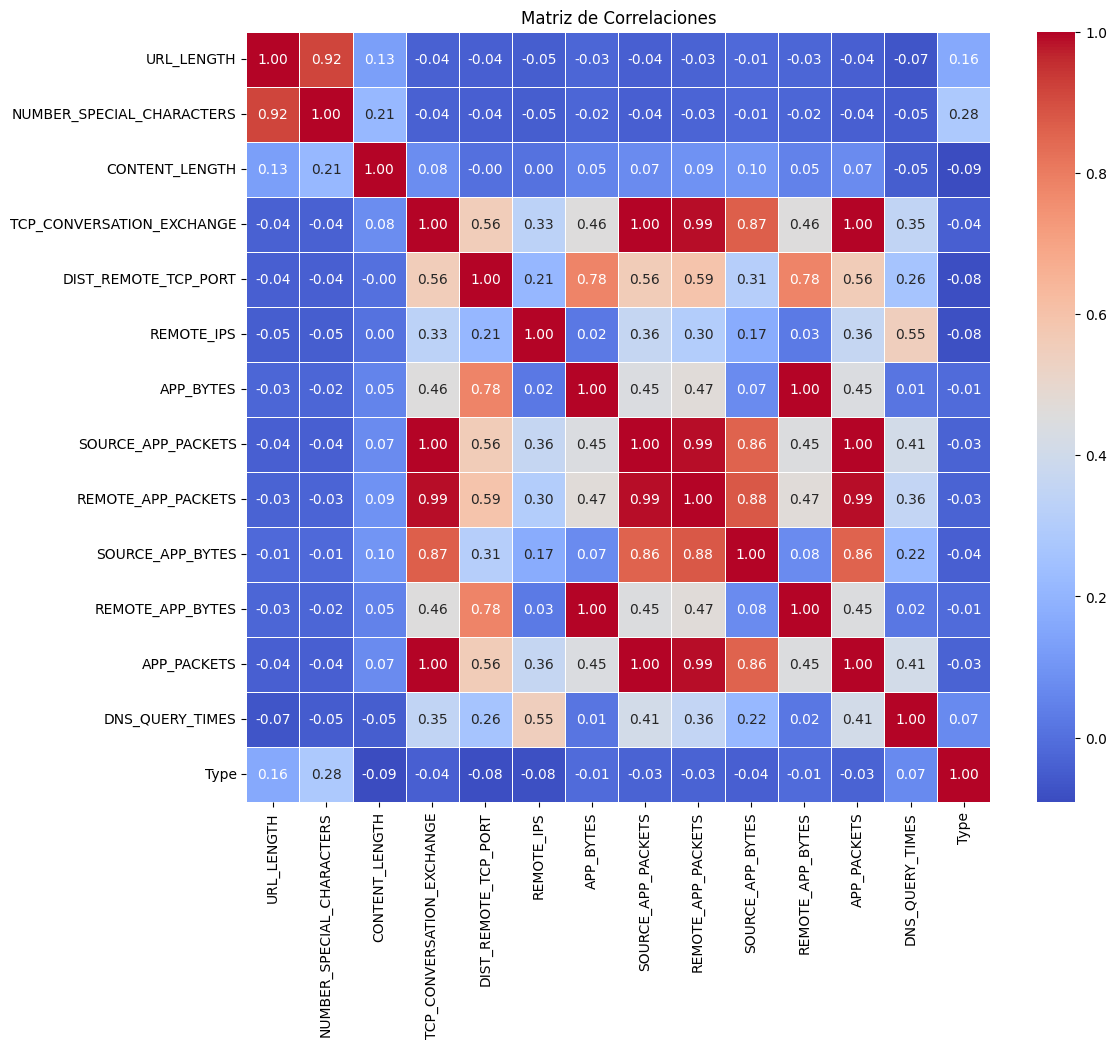

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
columnas_numericas = websites.select_dtypes(include=['number'])

# Calcular la matriz de correlaciones
matriz_correlaciones = columnas_numericas.corr()

# Crear un mapa de calor de la matriz de correlaciones
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlaciones, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlaciones')
plt.show()


In [197]:
# Crear una lista para almacenar las columnas con alta correlación
columnas_alta_correlacion = set()

# Iterar sobre la matriz de correlaciones y encontrar columnas con correlación > 0.75
for i in range(len(matriz_correlaciones.columns)):
    for j in range(i):
        if abs(matriz_correlaciones.iloc[i, j]) > 0.9:
            colname = matriz_correlaciones.columns[i]
            columnas_alta_correlacion.add(colname)

# Imprimir las columnas con alta correlación
print("Columnas con correlación superior a 0.9 que nos podría interesar eliminar:")
for col in columnas_alta_correlacion:
    print(col)

Columnas con correlación superior a 0.9 que nos podría interesar eliminar:
APP_PACKETS
SOURCE_APP_PACKETS
REMOTE_APP_BYTES
REMOTE_APP_PACKETS
NUMBER_SPECIAL_CHARACTERS


### Este es un ejemplo para conocer la importancia de las características usando un modelo ML

In [107]:
import xgboost as xgb

In [198]:
X = websites._get_numeric_data().drop('Type', axis=1)
y = websites.Type

In [199]:
from xgboost import XGBClassifier

# Crear una instancia del modelo XGBClassifier
model = XGBClassifier()

# Entrenar el modelo
model.fit(X, y)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [200]:
sort_idx = model.feature_importances_.argsort()

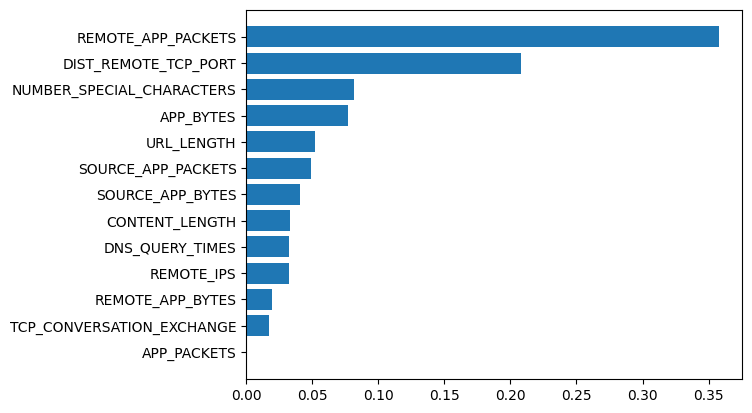

In [201]:
plt.barh(X.columns[sort_idx],model.feature_importances_[sort_idx])
plt.show();

    En el gráfico anterior podemos ver las características con menor peso en el conjunto de datos.

# Desafío 2 - Eliminar la colinealidad de columnas.

En el mapa de calor que ha creado, deberías haber visto al menos 3 columnas que pueden eliminarse debido a la alta colinealidad. Elimina estas columnas del conjunto de datos.

Ten en cuenta que debes eliminar el menor número posible de columnas. No tienes que eliminar todas las columnas a la vez. En su lugar, intenta eliminar una columna y, a continuación, vuelve a elaborar el mapa térmico para determinar si deben eliminarse columnas adicionales. Cuando el conjunto de datos ya no contenga columnas correlacionadas en más de un 90%, puedes parar. Además, ten en cuenta que cuando dos columnas tienen una alta colinealidad, sólo necesitas eliminar una de ellas, pero no ambas.

En las celdas de abajo, elimina tantas columnas como puedas para eliminar la alta colinealidad en el conjunto de datos. Asegúrate de comentar tu camino para que se pueda conocer tu razonamiento, lo que permitirá dar feedback. Al final, vuelve a imprimir el mapa de calor.

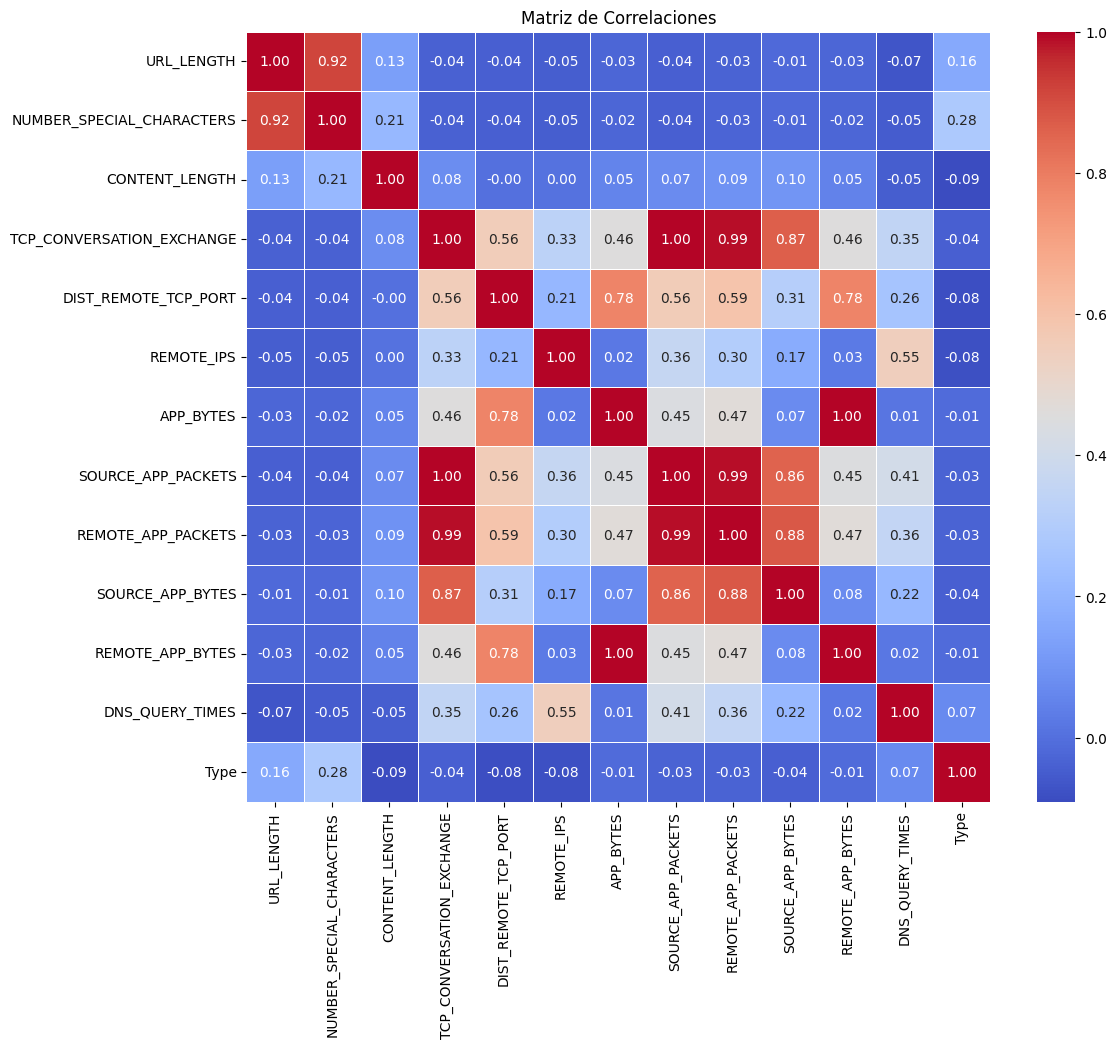

In [202]:
# PRIMERO TRATAMOS DE ELIMINAR 'APP PACKETS' QUE TIENE UNA ALTA COLINEALIDAD Y ADEMÁS ES LA VARIABLE QUE TIENES MENOS IMPORTANCIA TAL Y COMO HEMOS VISTO EN EL APARTADO ANTERIOR

columnas_numericas_drop_1 = columnas_numericas.drop('APP_PACKETS', axis=1)

# Calcular la matriz de correlaciones
matriz_correlaciones_drop_1 = columnas_numericas_drop_1.corr()

# Crear un mapa de calor de la matriz de correlaciones
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlaciones_drop_1, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlaciones')
plt.show()

#Eliminamos la columna del set original de datos
websites= websites.drop('APP_PACKETS', axis=1)

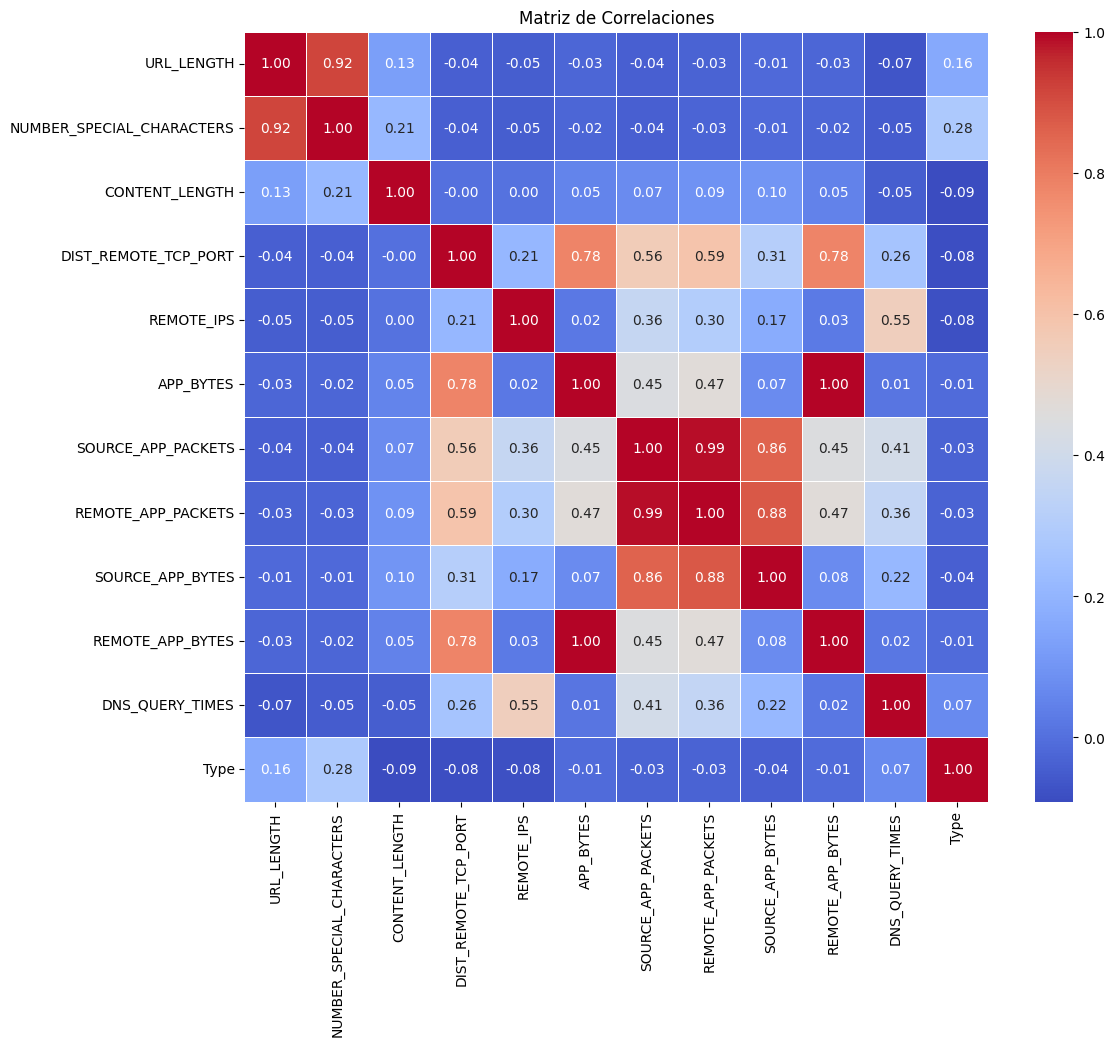

In [203]:
# EN SEGUNDO LUGAR TRATAMOS DE ELIMINAR 'TCP_CONVERSATION_EXCHANGE' QUE TIENE UNA ALTA COLINEALIDAD Y ADEMÁS ES LA SEGUNDA VARIABLE QUE TIENES MENOS IMPORTANCIA TAL Y COMO HEMOS VISTO EN EL APARTADO ANTERIOR

columnas_numericas_drop_2 = columnas_numericas_drop_1.drop('TCP_CONVERSATION_EXCHANGE', axis=1)

# Calcular la matriz de correlaciones
matriz_correlaciones_drop_2 = columnas_numericas_drop_2.corr()

# Crear un mapa de calor de la matriz de correlaciones
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlaciones_drop_2, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlaciones')
plt.show()

#Eliminamos la columna del set original de datos
websites= websites.drop('TCP_CONVERSATION_EXCHANGE', axis=1)

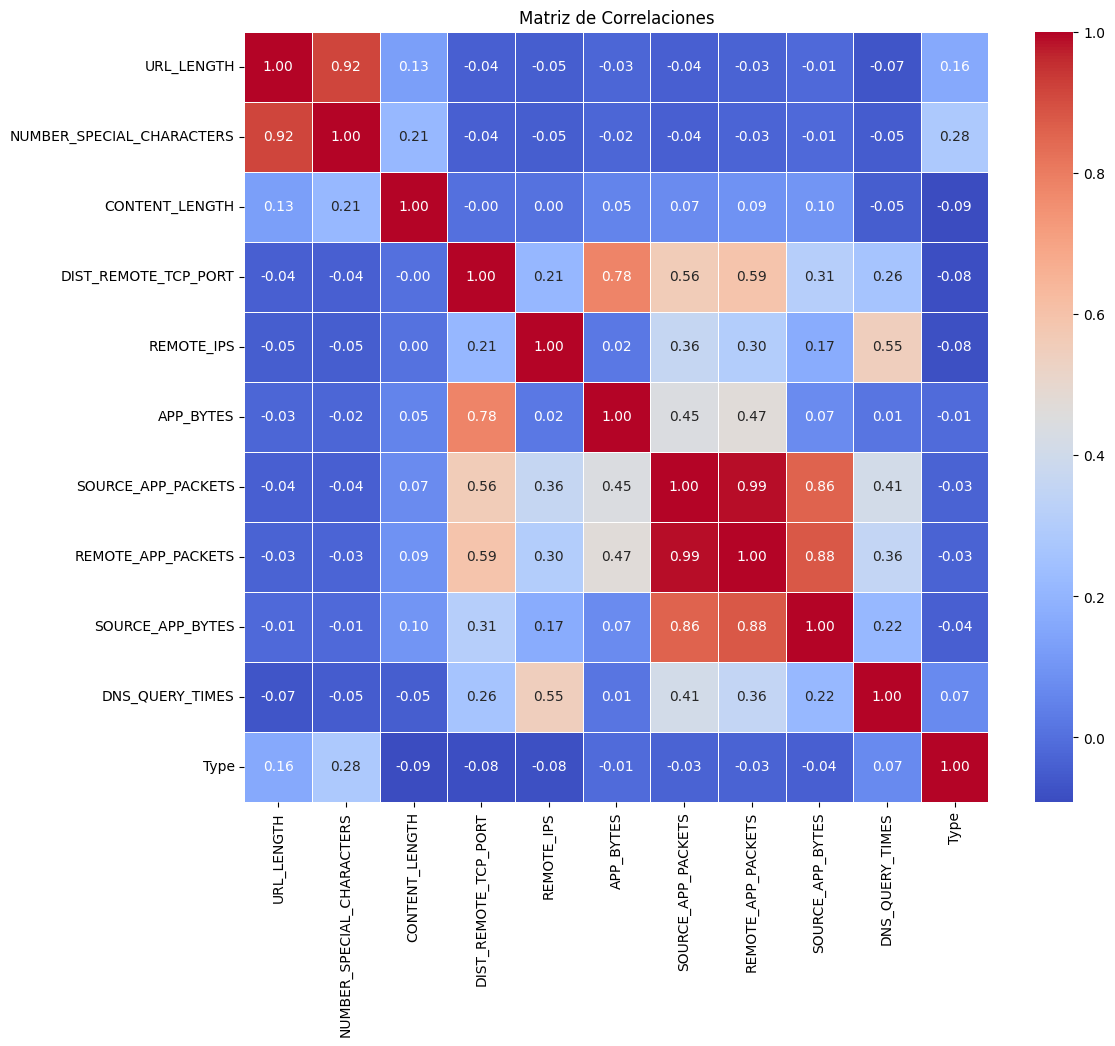

In [204]:
# EN TERCER LUGAR TRATAMOS DE ELIMINAR 'REMOTE_APP_BYTES' QUE TIENE UNA ALTA COLINEALIDAD Y ADEMÁS ES LA TERCERA VARIABLE QUE TIENES MENOS IMPORTANCIA TAL Y COMO HEMOS VISTO EN EL APARTADO ANTERIOR

columnas_numericas_drop_3 = columnas_numericas_drop_2.drop('REMOTE_APP_BYTES', axis=1)

# Calcular la matriz de correlaciones
matriz_correlaciones_drop_3 = columnas_numericas_drop_3.corr()

# Crear un mapa de calor de la matriz de correlaciones
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlaciones_drop_3, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlaciones')
plt.show()

#Eliminamos la columna del set original de datos
websites= websites.drop('REMOTE_APP_BYTES', axis=1)

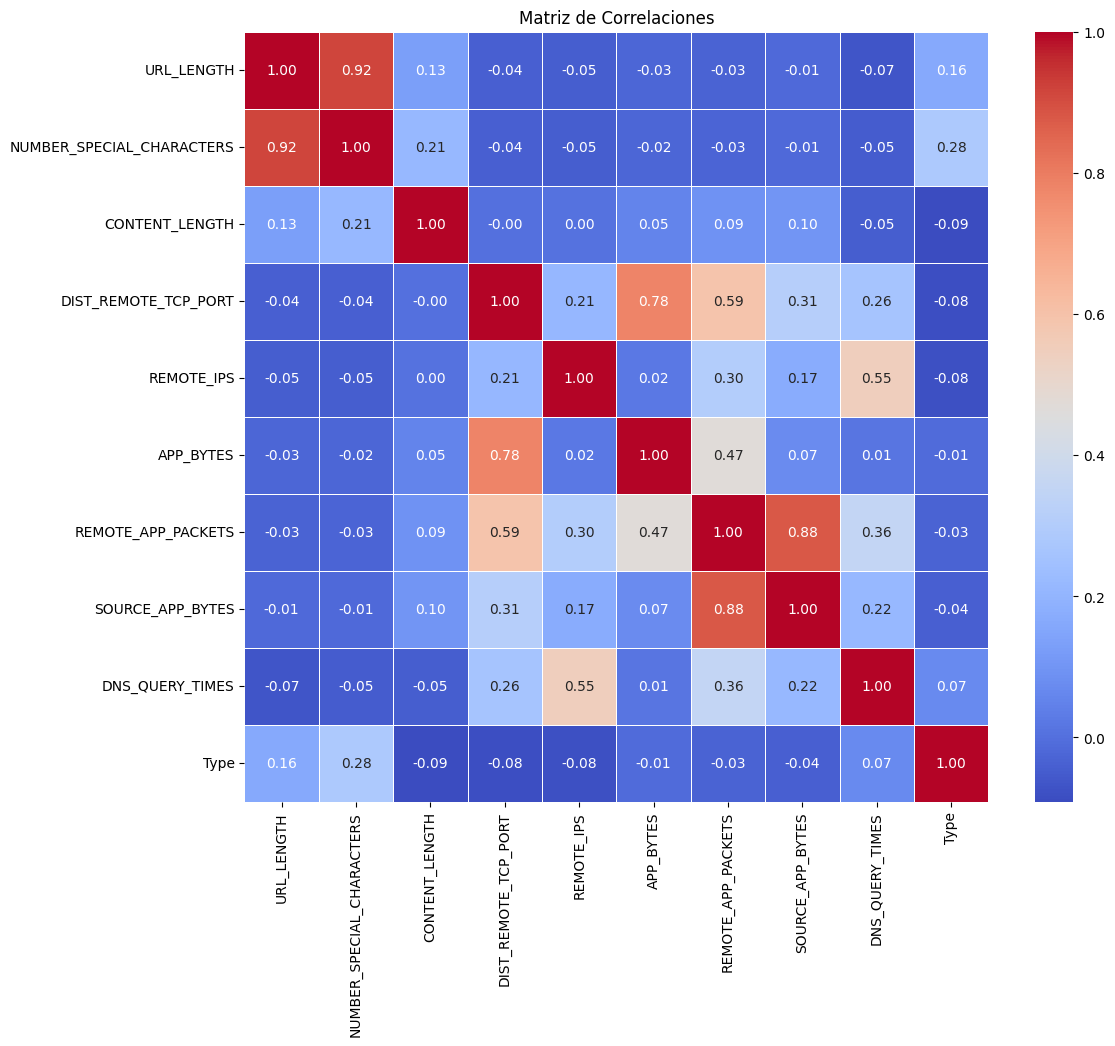

In [205]:
# EN CUARTO LUGAR DUDAMOS ELIMINAR 'REMOTE_APP_PACKETS' O 'SOURCE_APP_PACKETS', COMO LA SEGUNDA TIENE MENOS IMPORTANCIA, ELIMINAMOS ESTA

columnas_numericas_drop_4 = columnas_numericas_drop_3.drop('SOURCE_APP_PACKETS', axis=1)

# Calcular la matriz de correlaciones
matriz_correlaciones_drop_4 = columnas_numericas_drop_4.corr()

# Crear un mapa de calor de la matriz de correlaciones
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlaciones_drop_4, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlaciones')
plt.show()

#Eliminamos la columna del set original de datos
websites= websites.drop('SOURCE_APP_PACKETS', axis=1)

# Reto 3 - Manejar los valores que faltan

El siguiente paso sería manejar los valores faltantes. **Comenzamos examinando el número de valores que faltan en cada columna.**

In [206]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1774 non-null   object 
 4   SERVER                     1605 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1475 non-null   object 
 7   WHOIS_STATEPRO             1419 non-null   object 
 8   WHOIS_REGDATE              1654 non-null   object 
 9   WHOIS_UPDATED_DATE         1642 non-null   object 
 10  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 11  REMOTE_IPS                 1781 non-null   int64  
 12  APP_BYTES                  1781 non-null   int64  
 13  REMOTE_APP_PACKETS         1781 non-null   int64

In [207]:
# Contar los valores faltantes en cada columna
valores_faltantes = websites.isnull().sum()/len(websites)

# Imprimir el conteo de valores faltantes por columna
print(valores_faltantes)

URL                          0.000000
URL_LENGTH                   0.000000
NUMBER_SPECIAL_CHARACTERS    0.000000
CHARSET                      0.003930
SERVER                       0.098821
CONTENT_LENGTH               0.455924
WHOIS_COUNTRY                0.171814
WHOIS_STATEPRO               0.203257
WHOIS_REGDATE                0.071308
WHOIS_UPDATED_DATE           0.078046
DIST_REMOTE_TCP_PORT         0.000000
REMOTE_IPS                   0.000000
APP_BYTES                    0.000000
REMOTE_APP_PACKETS           0.000000
SOURCE_APP_BYTES             0.000000
DNS_QUERY_TIMES              0.000561
Type                         0.000000
dtype: float64


Firts we will drop the columns with more than 50% of missing data



In [208]:
#Eliminamos la columna 'CONTENT_LENGHT' que observamos que no explica mucho los datos
websites= websites.drop('CONTENT_LENGTH', axis=1)

In [209]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1774 non-null   object 
 4   SERVER                     1605 non-null   object 
 5   WHOIS_COUNTRY              1475 non-null   object 
 6   WHOIS_STATEPRO             1419 non-null   object 
 7   WHOIS_REGDATE              1654 non-null   object 
 8   WHOIS_UPDATED_DATE         1642 non-null   object 
 9   DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 10  REMOTE_IPS                 1781 non-null   int64  
 11  APP_BYTES                  1781 non-null   int64  
 12  REMOTE_APP_PACKETS         1781 non-null   int64  
 13  SOURCE_APP_BYTES           1781 non-null   int64

In [210]:
# Now we will drop the rows with missing data
websites = websites.dropna()

#### De nuevo, examina el número de valores que faltan en cada columna. 

    Si todos están limpios, procede. Si no, vuelve atrás y haz más limpieza.

In [213]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1257 entries, 3 to 1780
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1257 non-null   object 
 1   URL_LENGTH                 1257 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1257 non-null   int64  
 3   CHARSET                    1257 non-null   object 
 4   SERVER                     1257 non-null   object 
 5   WHOIS_COUNTRY              1257 non-null   object 
 6   WHOIS_STATEPRO             1257 non-null   object 
 7   WHOIS_REGDATE              1257 non-null   object 
 8   WHOIS_UPDATED_DATE         1257 non-null   object 
 9   DIST_REMOTE_TCP_PORT       1257 non-null   int64  
 10  REMOTE_IPS                 1257 non-null   int64  
 11  APP_BYTES                  1257 non-null   int64  
 12  REMOTE_APP_PACKETS         1257 non-null   int64  
 13  SOURCE_APP_BYTES           1257 non-null   int64  
 1

# Reto 4 - Manejar datos categóricos `WHOIS_*

Hay varias columnas categóricas que necesitamos manejar. Estas columnas son:

* URL
* CHARSET
* SERVIDOR
* PAÍS
* «WHOIS_STATEPRO
* WHOIS_REGDATE
* WHOIS_UPDATED_DATE

La forma de tratar las columnas de cadena es siempre caso por caso. Empecemos trabajando con `WHOIS_COUNTRY`. Tus pasos son:

1. Enumera los valores únicos de `WHOIS_COUNTRY`.
1. Consolide los valores de país con códigos de país coherentes. Por ejemplo, los siguientes valores se refieren al mismo país y deben utilizar un código de país coherente:
    * `CY` y `Cyprus`.
    * US y US
    * SE y SE
    * GB, Reino Unido y GB, Reino Unido.

#### En las celdas de abajo, fija los valores de los países como se indica arriba.

In [214]:
websites.WHOIS_COUNTRY.value_counts()

WHOIS_COUNTRY
US                957
CA                 75
ES                 63
AU                 26
PA                 21
GB                 13
JP                 10
CZ                  8
CN                  8
IN                  8
NL                  5
[u'GB'; u'UK']      5
CH                  5
BS                  4
UK                  4
ru                  4
AT                  4
KY                  3
PH                  3
SC                  3
us                  3
HK                  2
UA                  2
UY                  2
KG                  2
SI                  2
RU                  2
TR                  1
UG                  1
PK                  1
IL                  1
DE                  1
SE                  1
IT                  1
NO                  1
BE                  1
BY                  1
AE                  1
IE                  1
LV                  1
Name: count, dtype: int64

In [215]:
# Your code here
good_country = {'None':'None', 
                'US':'US', 
                'SC':'SC', 
                'GB':'UK', 
                'UK':'UK', 
                'RU':'RU', 
                'AU':'AU', 
                'CA':'CA',
                'PA':'PA',
                'se':'SE', 
                'IN':'IN',
                'LU':'LU', 
                'TH':'TH', 
                "[u'GB'; u'UK']":'UK', 
                'FR':'FR',
                'NL':'NL',
                'UG':'UG', 
                'JP':'JP', 
                'CN':'CN', 
                'SE':'SE',
                'SI':'SI', 
                'IL':'IL', 
                'ru':'RU', 
                'KY':'KY', 
                'AT':'AT', 
                'CZ':'CZ', 
                'PH':'PH', 
                'BE':'BE', 
                'NO':'NO', 
                'TR':'TR', 
                'LV':'LV',
                'DE':'DE', 
                'ES':'ES', 
                'BR':'BR', 
                'us':'US', 
                'KR':'KR', 
                'HK':'HK', 
                'UA':'UA', 
                'CH':'CH', 
                'United Kingdom':'UK',
                'BS':'BS', 
                'PK':'PK', 
                'IT':'IT', 
                'Cyprus':'CY', 
                'BY':'BY', 
                'AE':'AE', 
                'IE':'IE', 
                'UY':'UY', 
                'KG':'KG'}

websites.WHOIS_COUNTRY = websites.WHOIS_COUNTRY.apply(lambda x : good_country[x])




In [216]:
websites.WHOIS_COUNTRY.unique()

array(['US', 'SC', 'RU', 'AU', 'CA', 'PA', 'IN', 'UK', 'NL', 'UG', 'JP',
       'CN', 'SI', 'KY', 'AT', 'CZ', 'PH', 'LV', 'TR', 'ES', 'HK', 'UA',
       'CH', 'BS', 'PK', 'IL', 'DE', 'SE', 'IT', 'NO', 'BE', 'BY', 'AE',
       'IE', 'UY', 'KG'], dtype=object)

Ya que hemos fijado los valores de los países, ¿podemos convertir ahora esta columna en ordinal?

Todavía no. Si reflexionas, en los laboratorios anteriores sobre cómo manejamos las columnas categóricas, probablemente recuerdes que acabamos eliminando muchas de esas columnas porque hay demasiados valores únicos. Demasiados valores únicos en una columna no es deseable en el aprendizaje automático porque hace que la predicción sea inexacta. Pero hay soluciones bajo ciertas condiciones. Una de las condiciones solucionables es:

#### Si un número limitado de valores representa la mayoría de los datos, podemos conservar estos valores principales y volver a etiquetar todos los demás valores poco frecuentes.

La columna `WHOIS_COUNTRY` resulta ser este caso. Puedes comprobarlo imprimiendo un gráfico de barras de los `value_counts` en la siguiente celda para verificarlo:

In [217]:
# Your code here
def print_bar_plot(x,y):
    plt.bar(x, y)
    plt.figure(figsize=(20,20))
    return plt.show()

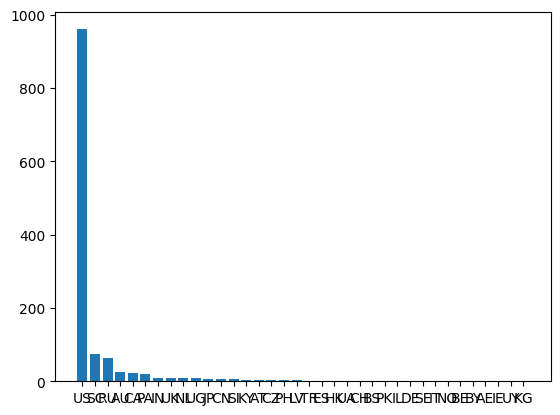

<Figure size 2000x2000 with 0 Axes>

In [218]:
print_bar_plot(websites.WHOIS_COUNTRY.unique(),websites.WHOIS_COUNTRY.value_counts());

#### Después de verificar, ahora vamos a mantener los 10 primeros valores de la columna y volver a etiquetar otras columnas con `OTHER`.

In [220]:
frecuencia_paises

WHOIS_COUNTRY
US       960
CA        75
OTHER     64
ES        63
AU        26
UK        22
PA        21
JP        10
IN         8
CN         8
Name: count, dtype: int64

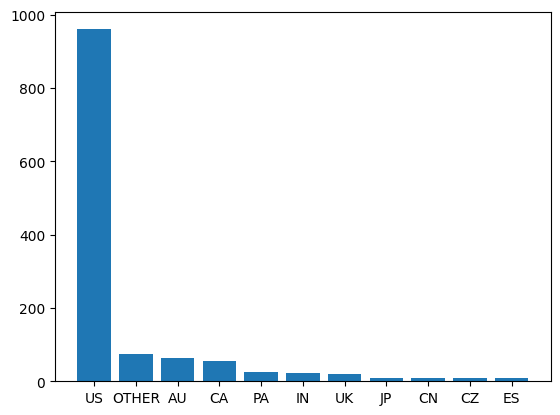

<Figure size 2000x2000 with 0 Axes>

In [221]:
# Contamos la frecuencia de cada valor en la columna
frecuencia_paises = websites.WHOIS_COUNTRY.value_counts()

#Definimos el top 10
top_10_paises = frecuencia_paises.index[:10]

# Reemplazamos los valores menos frecuentes con 'OTHER' mediante una f(x) lambda
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].apply(lambda x: x if x in top_10_paises else 'OTHER')

print_bar_plot(websites.WHOIS_COUNTRY.unique(),websites.WHOIS_COUNTRY.value_counts());


In [222]:
top_10_paises

Index(['US', 'CA', 'ES', 'AU', 'UK', 'PA', 'JP', 'IN', 'CZ', 'CN'], dtype='object', name='WHOIS_COUNTRY')

Ahora que se ha cambiado la etiqueta `WHOIS_COUNTRY`, ya no necesitamos `WHOIS_STATEPRO` porque los valores de los estados o provincias pueden dejar de ser relevantes. Eliminaremos esta columna.

Además, también eliminaremos `WHOIS_REGDATE` y `WHOIS_UPDATED_DATE`. Se trata de las fechas de registro y actualización de los dominios del sitio web. No son de nuestra incumbencia.

#### En la siguiente celda, elimina `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [224]:
delete = ['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']
websites = websites.drop(columns=delete)
websites.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1257 entries, 3 to 1780
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1257 non-null   object 
 1   URL_LENGTH                 1257 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1257 non-null   int64  
 3   CHARSET                    1257 non-null   object 
 4   SERVER                     1257 non-null   object 
 5   WHOIS_COUNTRY              1257 non-null   object 
 6   DIST_REMOTE_TCP_PORT       1257 non-null   int64  
 7   REMOTE_IPS                 1257 non-null   int64  
 8   APP_BYTES                  1257 non-null   int64  
 9   REMOTE_APP_PACKETS         1257 non-null   int64  
 10  SOURCE_APP_BYTES           1257 non-null   int64  
 11  DNS_QUERY_TIMES            1257 non-null   float64
 12  Type                       1257 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 137.

# Reto 5 - Manejar los datos categóricos restantes y convertirlos en ordinales

Ahora vuelve a imprimir los `dtypes` de los datos. Además de `WHOIS_COUNTRY` que ya hemos arreglado, deberían quedar 3 columnas categóricas: `URL`, `CHARSET`, y `SERVER`.

In [225]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1257 entries, 3 to 1780
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1257 non-null   object 
 1   URL_LENGTH                 1257 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1257 non-null   int64  
 3   CHARSET                    1257 non-null   object 
 4   SERVER                     1257 non-null   object 
 5   WHOIS_COUNTRY              1257 non-null   object 
 6   DIST_REMOTE_TCP_PORT       1257 non-null   int64  
 7   REMOTE_IPS                 1257 non-null   int64  
 8   APP_BYTES                  1257 non-null   int64  
 9   REMOTE_APP_PACKETS         1257 non-null   int64  
 10  SOURCE_APP_BYTES           1257 non-null   int64  
 11  DNS_QUERY_TIMES            1257 non-null   float64
 12  Type                       1257 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 137.

#### `URL` es fácil. Simplemente lo eliminaremos porque tiene demasiados valores únicos que no hay forma de consolidar.

In [226]:
websites= websites.drop('URL', axis=1)

#### Imprime el recuento de valores únicos de `CHARSET`. Usted ve que hay sólo unos pocos valores únicos. Así que podemos dejarlo como está.

In [227]:
frecuencia_charset = websites.CHARSET.value_counts()
frecuencia_charset

CHARSET
UTF-8           520
utf-8           279
ISO-8859-1      275
us-ascii         98
iso-8859-1       83
windows-1251      1
windows-1252      1
Name: count, dtype: int64

In [228]:
frecuencia_server = websites.SERVER.value_counts()
frecuencia_server

SERVER
Apache                                                                                311
nginx                                                                                 144
cloudflare-nginx                                                                       80
Microsoft-HTTPAPI/2.0                                                                  76
GSE                                                                                    49
                                                                                     ... 
Apache/2.4.6 (CentOS) OpenSSL/1.0.1e-fips mod_fcgid/2.3.9 PHP/5.4.16 mod_jk/1.2.40      1
mw2114.codfw.wmnet                                                                      1
mw2199.codfw.wmnet                                                                      1
fbs                                                                                     1
Apache/2.2.16 (Debian)                                                                  1
Nam

`SERVER` es un poco más complicado. Imprime sus valores únicos y piensa cómo puedes consolidar esos valores.

#### Antes de pensar en tu propia solución, no leas las instrucciones que vienen a continuación.

In [229]:
# Definimos una función
def reetiquetar_servidor(valor):
    valor = valor.lower() #ponemos todo en minúsculas
    if 'microsoft' in valor:
        return 'Microsoft'
    elif 'apache' in valor:
        return 'Apache'
    elif 'nginx' in valor:
        return 'Nginx'
    else:
        return 'Other'

websites['SERVER'] = websites['SERVER'].apply(reetiquetar_servidor)




Aunque hay tantos valores únicos en la columna `SERVER`, en realidad sólo hay 3 tipos principales de servidores: Microsoft, Apache y Nginx. Simplemente comprueba si cada valor de `SERVER` contiene alguno de esos tipos de servidor y vuelve a etiquetarlos. Para los valores `SERVER` que no contengan ninguna de esas subcadenas, etiquétalos con `Other`.

Al final, la columna «SERVIDOR» sólo debe contener 4 valores únicos: `Microsoft`, `Apache`, `nginx`, y `Other`.

In [230]:
# Verificar los valores únicos en la columna 'SERVER'
print(websites['SERVER'].value_counts())

SERVER
Apache       491
Nginx        323
Other        299
Microsoft    144
Name: count, dtype: int64


OK, todos nuestros datos categóricos están fijados ahora. **Vamos a convertirlos en datos ordinales usando la función `get_dummies` de Pandas ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Asegúrate de eliminar las columnas categóricas pasando `drop_first=True` a `get_dummies` ya que no las necesitamos. **Además, asigna los datos con valores ficticios a una nueva variable `website_dummy`.

In [233]:
from sklearn.preprocessing import LabelEncoder

In [243]:
#Definimos las columnas categóricas
columnas_categoricas = websites.select_dtypes(include=['object']).columns

# Inicializar el LabelEncoder
le = LabelEncoder()

# Crear una copia del DataFrame para almacenar los resultados
website_dummy = websites.copy()

# Crear un diccionario para almacenar el mapeo de cada columna categórica
mapeo_categorias = {}

# Convertir cada columna categórica en números y guardar el mapeo
for col in columnas_categoricas:
    website_dummy[col] = le.fit_transform(website_dummy[col]) + 1  # Agregar 1 para comenzar desde 1
    # Guardar el mapeo en el diccionario
    mapeo_categorias[col] = dict(zip(le.classes_, le.transform(le.classes_) + 1))

# Verificar el resultado
print(website_dummy.head())

# Verificar el diccionario de mapeo
print(mapeo_categorias)

    URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  CHARSET  SERVER  WHOIS_COUNTRY  \
3           17                          6        1       3             11   
5           18                          7        2       3              8   
6           18                          6        3       1             11   
7           19                          6        4       2             11   
10          20                          6        5       1             11   

    DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  REMOTE_APP_PACKETS  \
3                     22           3       3812                  37   
5                      6           9        894                  13   
6                      0           3       1189                  13   
7                      0           0          0                   0   
10                     0           0          0                   0   

    SOURCE_APP_BYTES  DNS_QUERY_TIMES  Type  
3              18784              8.0     0  
5                8

In [244]:
website_dummy.WHOIS_COUNTRY.unique()

array([11,  8,  1,  2,  9,  6, 10,  7,  3,  4,  5])

In [250]:
mapeo_categorias['WHOIS_COUNTRY']

{'AU': 1,
 'CA': 2,
 'CN': 3,
 'CZ': 4,
 'ES': 5,
 'IN': 6,
 'JP': 7,
 'OTHER': 8,
 'PA': 9,
 'UK': 10,
 'US': 11}

In [245]:
website_dummy.CHARSET.unique()

array([1, 2, 3, 4, 5, 6, 7])

In [249]:
mapeo_categorias['CHARSET']

{'ISO-8859-1': 1,
 'UTF-8': 2,
 'iso-8859-1': 3,
 'us-ascii': 4,
 'utf-8': 5,
 'windows-1251': 6,
 'windows-1252': 7}

In [246]:
website_dummy.SERVER.unique()

array([3, 1, 2, 4])

In [251]:
mapeo_categorias['SERVER']

{'Apache': 1, 'Microsoft': 2, 'Nginx': 3, 'Other': 4}

Ahora, inspeccione `website_dummy` para asegurarse de que los datos y tipos son los previstos - no debería haber ninguna columna categórica en este punto.

In [252]:
website_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1257 entries, 3 to 1780
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL_LENGTH                 1257 non-null   int64  
 1   NUMBER_SPECIAL_CHARACTERS  1257 non-null   int64  
 2   CHARSET                    1257 non-null   int64  
 3   SERVER                     1257 non-null   int64  
 4   WHOIS_COUNTRY              1257 non-null   int64  
 5   DIST_REMOTE_TCP_PORT       1257 non-null   int64  
 6   REMOTE_IPS                 1257 non-null   int64  
 7   APP_BYTES                  1257 non-null   int64  
 8   REMOTE_APP_PACKETS         1257 non-null   int64  
 9   SOURCE_APP_BYTES           1257 non-null   int64  
 10  DNS_QUERY_TIMES            1257 non-null   float64
 11  Type                       1257 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 127.7 KB


Podemos observar que tenemos los datos esperados, hemos hecho la transformación de todas las varibles categóricas a nuiméricas y hemos limpiado los datos.

# Desafío 6 - Modelado, predicción y evaluación

Comenzaremos esta sección dividiendo los datos en train y test. **Nombra tus 4 variables `X_entrenamiento`, `X_prueba`, `y_entrenamiento` y `y_prueba`. Selecciona el 80% de los datos para entrenar y el 20% para probar.**

In [254]:
from sklearn.model_selection import train_test_split

X = website_dummy.drop('Type', axis=1)
y = website_dummy['Type']

In [282]:
# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1005, 11) (252, 11) (1005,) (252,)


#### En este laboratorio, probaremos dos modelos diferentes y compararemos nuestros resultados.

El primer modelo que utilizaremos en este laboratorio es la regresión logística. Ya hemos aprendido sobre la regresión logística como algoritmo de clasificación. En la celda de abajo, cargue `LogisticRegression` de scikit-learn e inicialice el modelo.

In [283]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=8000,random_state=42)

print(logistic_model)


LogisticRegression(max_iter=8000, random_state=42)


A continuación, ajustamos el modelo a nuestros datos de entrenamiento. Ya hemos separado nuestros datos en 4 partes. Utilízalos en tu modelo.

In [284]:
# Your code here:
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=8000, random_state=42)

Por último, importamos `confusion_matrix` y `accuracy_score` de `sklearn.metrics` y ajustamos nuestros datos de prueba. Asigna los datos ajustados a `y_pred` e imprime la matriz de confusión y la puntuación de precisión.

In [285]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

[[224   0]
 [ 14  14]]


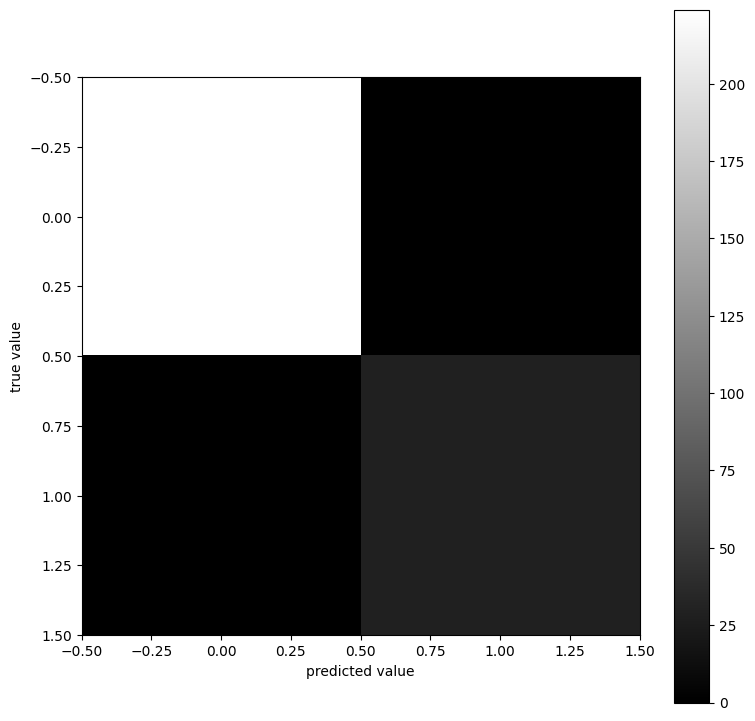

In [289]:
# Realizar predicciones en los datos de prueba
y_pred = logistic_model.predict(X_test)

# Calcular y mostrar la matriz de confusión
def plot_confusion_matrix(y_pred, y):
    plt.imshow(confusion_matrix(y, y_pred), interpolation='nearest', cmap='grey')
    plt.colorbar()
    plt.ylabel('true value')
    plt.xlabel('predicted value')
    fig = plt.gcf()
    fig.set_size_inches(9, 9)

plot_confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

In [291]:
# Calcular y mostrar la puntuación de precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")

# Imprimir un informe de clasificación detallado
print("Informe de clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.9444444444444444
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       224
           1       1.00      0.50      0.67        28

    accuracy                           0.94       252
   macro avg       0.97      0.75      0.82       252
weighted avg       0.95      0.94      0.94       252



¿Qué opinas del rendimiento del modelo? Escribe tus conclusiones a continuación.

### Conclusiones:


#### Nuestro segundo algoritmo es DecisionTreeClassifier

Aunque no es necesario, vamos a ajustar un modelo utilizando los datos de entrenamiento y luego probar el rendimiento del modelo utilizando los datos de prueba. Empezaremos cargando `DecisionTreeClassifier` de scikit-learn y luego inicializando y ajustando el modelo. Empezaremos con un modelo donde max_depth=3

In [292]:
from sklearn.tree import DecisionTreeClassifier

In [297]:
# Inicializar el modelo de árbol de decisión con max_depth=3
decision_tree_model_3 = DecisionTreeClassifier(max_depth=3, random_state=42)

# Ajustar el modelo a los datos de entrenamiento
decision_tree_model_3.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

Para probar tu modelo, calcula las probabilidades predichas, decide 0 o 1 utilizando un umbral de 0,5 e imprime la matriz de confusión, así como la puntuación de precisión (en el conjunto de prueba).

In [298]:
# Calcular las probabilidades predichas para el conjunto de prueba
y_prob = decision_tree_model_3.predict_proba(X_test)[:, 1]

# Decidir la clase utilizando un umbral de 0.5
y_pred = (y_prob >= 0.5).astype(int)

# Calcular y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

# Calcular y mostrar la puntuación de precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")

# Imprimir un informe de clasificación detallado
print("Informe de clasificación:")
print(classification_report(y_test, y_pred))


Matriz de confusión:
[[222   2]
 [ 18  10]]
Precisión del modelo: 0.9206349206349206
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       224
           1       0.83      0.36      0.50        28

    accuracy                           0.92       252
   macro avg       0.88      0.67      0.73       252
weighted avg       0.91      0.92      0.91       252



#### Vamos a crear otro modelo DecisionTreeClassifier con max_depth=5. 
Inicia y ajusta el modelo de abajo e imprime la matriz de confusión y la puntuación de precisión.

In [299]:
# Inicializar el modelo de árbol de decisión con max_depth=3
decision_tree_model_5 = DecisionTreeClassifier(max_depth=5, random_state=42)

# Ajustar el modelo a los datos de entrenamiento
decision_tree_model_5.fit(X_train, y_train)

# Calcular las probabilidades predichas para el conjunto de prueba
y_prob = decision_tree_model_5.predict_proba(X_test)[:, 1]

# Decidir la clase utilizando un umbral de 0.5
y_pred = (y_prob >= 0.5).astype(int)

# Calcular y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

# Calcular y mostrar la puntuación de precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")

# Imprimir un informe de clasificación detallado
print("Informe de clasificación:")
print(classification_report(y_test, y_pred))

Matriz de confusión:
[[211  13]
 [  5  23]]
Precisión del modelo: 0.9285714285714286
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       224
           1       0.64      0.82      0.72        28

    accuracy                           0.93       252
   macro avg       0.81      0.88      0.84       252
weighted avg       0.94      0.93      0.93       252



¿Has observado una mejora en la matriz de confusión al aumentar max_depth a 5? ¿Has observado una mejora en la puntuación de precisión? Escribe tus conclusiones a continuación.

### Conclusión:

max_depth=5: Este modelo tiene un mejor rendimiento en términos de recall para la clase 1 (0.82 frente a 0.36), lo que indica que identifica más correctamente los verdaderos positivos. Aunque la precisión es más baja para la clase 1 (0.64), su F1-score más alto (0.72) sugiere un mejor equilibrio entre precisión y recall.


max_depth=3: Este modelo tiene una precisión más alta para la clase 1 (0.83), pero un recall mucho más bajo (0.36), lo que indica que falla en identificar muchos positivos. Su F1-score más bajo (0.50) refleja este desequilibrio.

<!-- Add your conclusion here -->

# Bonus Challenge - Escalado de características

La resolución de problemas en el aprendizaje automático es iterativa. Puede mejorar la predicción de su modelo con diversas técnicas (aunque hay un punto óptimo para el tiempo que invierte y la mejora que obtiene). Ahora sólo has completado una iteración del análisis ML. Hay más iteraciones que puedes realizar para introducir mejoras. Para poder hacerlo, necesitarás conocimientos más profundos en estadística y dominar más técnicas de análisis de datos. En este bootcamp, no tenemos tiempo para alcanzar ese objetivo avanzado. Pero harás esfuerzos constantes después del bootcamp para conseguirlo finalmente.

Sin embargo, ahora sí queremos que aprendas una de las técnicas avanzadas que se llama *feature scaling*. La idea del escalado de características es estandarizar/normalizar el rango de variables independientes o características de los datos. Esto puede hacer que los valores atípicos sean más evidentes para que pueda eliminarlos. Este paso debe realizarse durante el Desafío 6 después de dividir los datos de entrenamiento y de prueba, ya que no desea dividir los datos de nuevo, lo que hace imposible comparar los resultados con y sin el escalado de características. Para conceptos generales sobre el escalado de características, haga clic [aquí](https://en.wikipedia.org/wiki/Feature_scaling). Para profundizar, haga clic [aquí](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

En la siguiente celda, intente mejorar la precisión de predicción de su modelo mediante el escalado de características. Una librería que puedes utilizar es `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). Utilizarás `RobustScaler` para ajustar y transformar tu `X_train`, y luego transformar `X_test`. Utilizarás la regresión logística para ajustar y predecir tus datos transformados y obtener la puntuación de precisión de la misma manera. Compare la puntuación de precisión con sus datos normalizados con los datos de precisión anteriores. ¿Se ha producido alguna mejora?

In [141]:
# Your code here

## Conclusiones:

Add your comments here: